#SE4050 - Deep Learning
## Lab Activty 04


### Student ID : IT19972176
### Name : Jayawardana G.V.H.D

In [ ]:
#Imports
#Please include all your imports here
from torch import functional
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import torch.utils.data as data
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance

In [ ]:
#Please include any pre-processing or data visualization here. 
#must include dataset loading, train test split, here. 
#train = 
#test = 


In [ ]:
class Sharpie(object):
    def __init__(self,factor):
        self.factor = factor

    def __call__(self, x):
        enhancer = ImageEnhance.Sharpness(x)
        img = enhancer.enhance(self.factor)
        return img

In [ ]:
torch.manual_seed(42)
transformations = transforms.Compose([
                    transforms.Resize((300, 300)),
                    transforms.Grayscale(3),
                    transforms.Lambda(lambda x: torchvision.transforms.functional.adjust_contrast(x, 2)),
                    transforms.Lambda(lambda x: torchvision.transforms.functional.adjust_contrast(x, 2)),
                    transforms.Lambda(lambda x: torchvision.transforms.functional.adjust_gamma(x, 2)),
                    Sharpie(factor = 2),
                    transforms.ToTensor(),
                    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
                    
])

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu' 

In [ ]:
rmdir /content/images/manga/.ipynb_checkpoints/

In [ ]:
dataset = datasets.ImageFolder('/content/images/manga',transform = transformations)

In [ ]:
train, test, _  = data.random_split(dataset=dataset, lengths=[300, 150, 5],
generator=torch.Generator().manual_seed(42))

In [ ]:
train_loader = data.DataLoader(train, shuffle = True, batch_size= 15)
test_loader = data.DataLoader(test, shuffle= True, batch_size= 10)

In [ ]:
#Please include your model here. use the below fomat. Model variable name should be 'model'
# model = keras.Sequential()
# model.add(........)


In [ ]:
def imshow(img):
    ax = plt.subplots(figsize = (30, 90))
    inp = img.numpy().transpose((1,2,0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp, interpolation='nearest')

['happy' 'sad' 'sad' 'happy' 'shock']


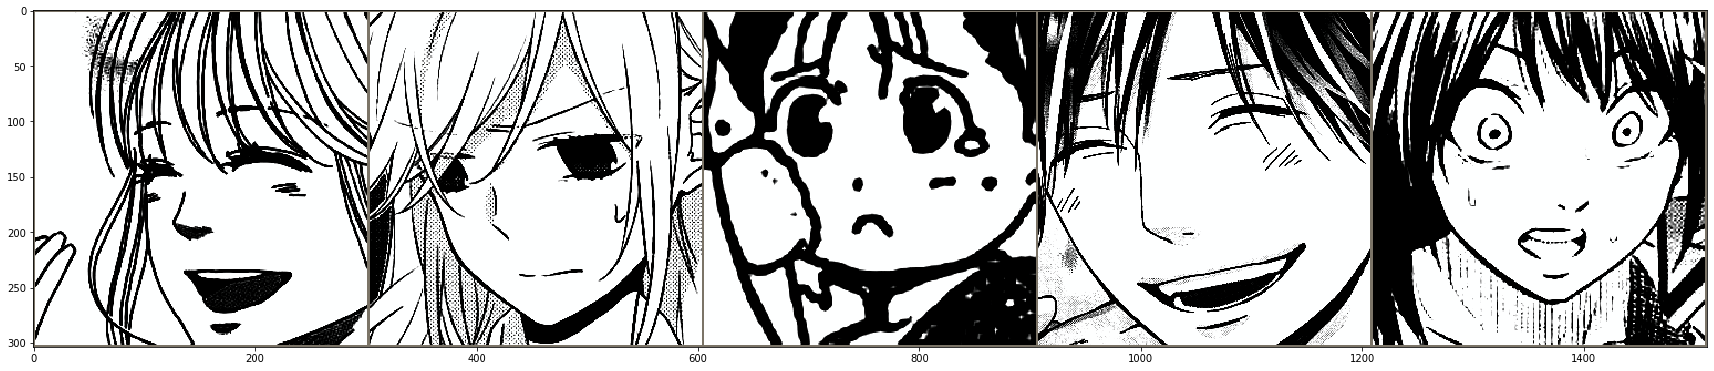

In [ ]:
inputs, classes = next(iter(train_loader))
grid = torchvision.utils.make_grid(inputs[:5])
print(np.array(dataset.classes)[classes[:5].numpy()])
imshow(grid)

In [ ]:
def train_model(epoch, train_loader, optimizer, model):
    model.train()

    for batch_idx, (inputs, target) in enumerate(train_loader):
        inputs, target = inputs.to(device), target.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 5 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(inputs), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

In [ ]:
def test_model(epoch, test_loader, model):
    model.eval()
    running_loss = 0
    running_acc = 0

    with torch.no_grad():
        for batch_idx, (inputs, target) in enumerate(test_loader):
            inputs, target = inputs.to(device), target.to(device)
            output = model(inputs)
            running_loss += criterion(output, target).item() * inputs.size(0)
            pred = output.argmax(dim = 1, keepdim = True)
            running_acc += pred.eq(target.view_as(pred)).sum().item()

    running_loss = running_loss / len(test_loader.dataset)
    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        running_loss, running_acc, len(test_loader.dataset),
        100. * running_acc / len(test_loader.dataset)))

In [ ]:
# Include your model evaluation here
#must include accuracy

In [ ]:
criterion = nn.CrossEntropyLoss()
my_model = models.resnet50(pretrained = True)

for param in my_model.parameters():
    param.requires_grad  = False

in_feats = my_model.fc.in_features
my_model.fc = nn.Linear(in_feats, 7)
my_model = my_model.to(device)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
optimizer = optim.Adam(my_model.parameters(), lr = 0.001, weight_decay= 0.001)

In [ ]:
for epoch in range(1, 7):
    print('\nTraining:')
    train_model(epoch, train_loader, optimizer, my_model)
    print('\nTesting:')
    test_model(epoch,test_loader, my_model)


Training:
Train Epoch: 1 [0/300 (0%)]	Loss: 1.933596
Train Epoch: 1 [75/300 (25%)]	Loss: 1.995838
Train Epoch: 1 [150/300 (50%)]	Loss: 2.025265
Train Epoch: 1 [225/300 (75%)]	Loss: 2.034090

Testing:
Test set: Average loss: 1.8196, Accuracy: 55/150 (37%)


Training:
Train Epoch: 2 [0/300 (0%)]	Loss: 1.808571
Train Epoch: 2 [75/300 (25%)]	Loss: 2.041013
Train Epoch: 2 [150/300 (50%)]	Loss: 1.805260
Train Epoch: 2 [225/300 (75%)]	Loss: 1.619361

Testing:
Test set: Average loss: 1.7232, Accuracy: 57/150 (38%)


Training:
Train Epoch: 3 [0/300 (0%)]	Loss: 1.877502
Train Epoch: 3 [75/300 (25%)]	Loss: 1.403451
Train Epoch: 3 [150/300 (50%)]	Loss: 1.794444
Train Epoch: 3 [225/300 (75%)]	Loss: 1.675886

Testing:
Test set: Average loss: 1.8088, Accuracy: 44/150 (29%)


Training:
Train Epoch: 4 [0/300 (0%)]	Loss: 1.583006
Train Epoch: 4 [75/300 (25%)]	Loss: 1.689979
Train Epoch: 4 [150/300 (50%)]	Loss: 1.347561
Train Epoch: 4 [225/300 (75%)]	Loss: 1.596720

Testing:
Test set: Average loss: 1.69

In [ ]:
for param in my_model.parameters():
    param.requires_grad = True
    
for epoch in range(1, 4):
    print('\nTraining:')
    train_model(epoch, train_loader, optimizer, my_model)
    print('\n Testing:')
    test_model(epoch,test_loader, my_model)


Training:
Train Epoch: 1 [0/300 (0%)]	Loss: 1.418622
Train Epoch: 1 [75/300 (25%)]	Loss: 1.527214
Train Epoch: 1 [150/300 (50%)]	Loss: 1.807360
Train Epoch: 1 [225/300 (75%)]	Loss: 1.819647

 Testing:
Test set: Average loss: 27.5096, Accuracy: 31/150 (21%)


Training:
Train Epoch: 2 [0/300 (0%)]	Loss: 1.612325
Train Epoch: 2 [75/300 (25%)]	Loss: 1.699431
Train Epoch: 2 [150/300 (50%)]	Loss: 1.425044
Train Epoch: 2 [225/300 (75%)]	Loss: 1.178990

 Testing:
Test set: Average loss: 4.4238, Accuracy: 55/150 (37%)


Training:
Train Epoch: 3 [0/300 (0%)]	Loss: 1.219163
Train Epoch: 3 [75/300 (25%)]	Loss: 0.887887
Train Epoch: 3 [150/300 (50%)]	Loss: 0.907399
Train Epoch: 3 [225/300 (75%)]	Loss: 1.236383

 Testing:
Test set: Average loss: 10.4942, Accuracy: 29/150 (19%)



Include the details of your model here. Marks will be moslty based on the desription below and how it agree with the Model you have built. So it is okay for the accuracy to be low as long as you undertand what the model you have build does and how it behaves. :)

Remeber "More Layers" doesn't always results in "High Accuracy"

1.  Layers



>  > Layer 1 : Type of Layer, 

> > > Parameters(trainable)

> > > Hyper-Parameters

> > > dimmentions

> > > usage and reson for parameter selection

>  > Layer 2 : Type of layer, 

> > > Parameters(trainable)

> > > Hyper-Parameters

> > > dimmentions

> > > usage reson for parameter selection




